In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import geopandas as gpd

# esto configura la calidad de la imagen. dependerá de tu resolución. el valor por omisión es 80
mpl.rcParams["figure.dpi"] = 96
# esto depende de las fuentes que tengas instaladas en el sistema.
mpl.rcParams["font.family"] = "Fira Sans Extra Condensed"

In [4]:
pd.set_option('display.max_columns', None)

In [64]:
microdatos_chile = pd.read_csv('../data/external/Censo2017_Microdatos_CSV/Microdato_Censo2017-Personas.csv', sep=';', converters={'P18': lambda x : x.strip()})
microdatos_chile

,REGION,PROVINCIA,COMUNA,DC,AREA,ZC_LOC,ID_ZONA_LOC,NVIV,NHOGAR,PERSONAN,P07,P08,P09,P10,P10COMUNA,P10PAIS,P11,P11COMUNA,P11PAIS,P12,P12COMUNA,P12PAIS,P12A_LLEGADA,P12A_TRAMO,P13,P14,P15,P15A,P16,P16A,P16A_OTRO,P17,P18,P19,P20,P21M,P21A,P10PAIS_GRUPO,P11PAIS_GRUPO,P12PAIS_GRUPO,ESCOLARIDAD,P16A_GRUPO
0,15,152,15202,1,2,6,13225,1,1,1,1,1,73,1,98,998,3,15101,998,1,98,998,9998,98,2,4,6,2,1,2,98,7,98,98,98,98,9998,998,998,998,4,2
1,15,152,15202,1,2,6,13225,3,1,1,1,1,78,1,98,998,2,98,998,1,98,998,9998,98,3,98,98,98,1,2,98,7,98,98,98,98,9998,998,998,998,0,2
2,15,152,15202,1,2,6,13225,3,1,2,2,2,78,1,98,998,2,98,998,1,98,998,9998,98,3,98,98,98,1,2,98,7,98,1,1,3,1965,998,998,998,0,2
3,15,152,15202,1,2,6,13225,3,1,3,5,2,52,1,98,998,2,98,998,1,98,998,9998,98,1,2,5,2,1,2,98,7,98,2,1,4,1995,998,998,998,2,2
4,15,152,15202,1,2,6,13225,3,1,4,11,1,44,1,98,998,2,98,998,1,98,998,9998,98,1,3,5,2,1,2,98,1,Z,98,98,98,9998,998,998,998,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17573998,1,11,1101,99,1,999,12486,234,1,1,1,1,74,1,98,998,2,98,998,2,4301,998,9998,98,2,3,5,2,2,98,98,1,A,98,98,98,9998,998,998,998,3,98
17573999,1,11,1101,99,1,999,12486,235,1,1,1,1,36,1,98,998,2,98,998,2,13107,998,9998,98,2,4,7,1,1,1,98,1,F,98,98,98,9998,998,998,998,12,1
17574000,1,11,1101,99,1,999,12486,236,1,1,1,2,51,1,98,998,2,98,998,1,98,998,9998,98,2,4,12,1,2,98,98,1,S,3,3,3,2007,998,998,998,16,98
17574001,1,11,1101,99,1,999,12486,236,1,2,5,2,19,1,98,998,2,98,998,1,98,998,9998,98,1,1,12,2,2,98,98,5,98,0,98,98,9998,998,998,998,13,98


In [24]:
len(microdatos_chile.ID_ZONA_LOC.unique())

15500

In [14]:
from aves.data import census
import sys
from pathlib import Path

AVES_ROOT = Path("..") if not "google.colab" in sys.modules else Path("aves_git")

localidades = census.read_census_map('localidad', path=AVES_ROOT / "data" / "external" / "censo_2017_R10")

In [20]:
chiloe = localidades.query('NOM_PROVIN == "CHILOÉ"')

<AxesSubplot:>

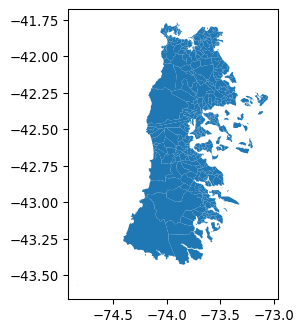

In [22]:
chiloe.plot()

In [68]:
geo_chiloé = chiloe.merge(microdatos_chile, left_on = 'LOC_ZON', right_on = 'ID_ZONA_LOC')
geo_chiloé

,REGION_x,NOM_REGION,PROVINCIA_x,NOM_PROVIN,COMUNA_x,NOM_COMUNA,DISTRITO,LOC_ZON,NOM_LOCALI,GEOCODIGO,SHAPE_Leng,SHAPE_Area,geometry,REGION_y,PROVINCIA_y,COMUNA_y,DC,AREA,ZC_LOC,ID_ZONA_LOC,NVIV,NHOGAR,PERSONAN,P07,P08,P09,P10,P10COMUNA,P10PAIS,P11,P11COMUNA,P11PAIS,P12,P12COMUNA,P12PAIS,P12A_LLEGADA,P12A_TRAMO,P13,P14,P15,P15A,P16,P16A,P16A_OTRO,P17,P18,P19,P20,P21M,P21A,P10PAIS_GRUPO,P11PAIS_GRUPO,P12PAIS_GRUPO,ESCOLARIDAD,P16A_GRUPO
0,10,REGIÓN DE LOS LAGOS,102,CHILOÉ,10201,CASTRO,10,22,PIRUQUINA,10201102022,0.307185,0.001781,"MULTIPOLYGON (((-73.81210 -42.37894, -73.81213...",10,103,10304,3,2,18,22,1,1,1,1,1,49,1,98,998,2,98,998,1,98,998,9998,98,2,6,5,2,2,98,98,1,A,98,98,98,9998,998,998,998,6,98
1,10,REGIÓN DE LOS LAGOS,102,CHILOÉ,10201,CASTRO,10,22,PIRUQUINA,10201102022,0.307185,0.001781,"MULTIPOLYGON (((-73.81210 -42.37894, -73.81213...",10,103,10304,3,2,18,22,2,1,1,1,1,71,1,98,998,2,98,998,2,10301,998,9998,98,2,3,5,2,2,98,98,1,A,98,98,98,9998,998,998,998,3,98
2,10,REGIÓN DE LOS LAGOS,102,CHILOÉ,10201,CASTRO,10,22,PIRUQUINA,10201102022,0.307185,0.001781,"MULTIPOLYGON (((-73.81210 -42.37894, -73.81213...",10,103,10304,3,2,18,22,2,1,2,2,2,60,99,99,999,2,98,998,2,10301,998,9998,98,2,6,5,2,2,98,98,6,98,2,2,8,1983,999,998,998,6,98
3,10,REGIÓN DE LOS LAGOS,102,CHILOÉ,10201,CASTRO,10,22,PIRUQUINA,10201102022,0.307185,0.001781,"MULTIPOLYGON (((-73.81210 -42.37894, -73.81213...",10,103,10304,3,2,18,22,3,1,1,1,1,53,1,98,998,2,98,998,1,98,998,9998,98,2,6,5,2,2,98,98,3,Z,98,98,98,9998,998,998,998,6,98
4,10,REGIÓN DE LOS LAGOS,102,CHILOÉ,10201,CASTRO,10,22,PIRUQUINA,10201102022,0.307185,0.001781,"MULTIPOLYGON (((-73.81210 -42.37894, -73.81213...",10,103,10304,3,2,18,22,3,1,2,2,2,47,1,98,998,2,98,998,1,98,998,9998,98,2,4,8,1,2,98,98,1,G,2,2,8,1989,998,998,998,12,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484780,10,REGIÓN DE LOS LAGOS,102,CHILOÉ,10202,ANCUD,9,75,QUICHITUÉ,10202092075,0.202189,0.002401,"POLYGON ((-73.76513 -42.00879, -73.76656 -42.0...",7,74,7404,2,1,2,75,2217,1,1,1,2,30,1,98,998,2,98,998,1,98,998,9998,98,2,1,11,1,2,98,98,8,98,1,1,10,2012,998,998,998,13,98
484781,10,REGIÓN DE LOS LAGOS,102,CHILOÉ,10202,ANCUD,9,75,QUICHITUÉ,10202092075,0.202189,0.002401,"POLYGON ((-73.76513 -42.00879, -73.76656 -42.0...",7,74,7404,2,1,2,75,2217,1,2,5,2,4,1,98,998,1,98,998,1,98,998,9998,98,1,0,1,1,2,98,98,98,98,98,98,98,9998,998,998,998,0,98
484782,10,REGIÓN DE LOS LAGOS,102,CHILOÉ,10202,ANCUD,9,75,QUICHITUÉ,10202092075,0.202189,0.002401,"POLYGON ((-73.76513 -42.00879, -73.76656 -42.0...",7,74,7404,2,1,2,75,2218,1,1,1,2,83,1,98,998,2,98,998,2,8416,998,9998,98,2,3,5,2,2,98,98,7,98,6,4,3,1972,998,998,998,3,98
484783,10,REGIÓN DE LOS LAGOS,102,CHILOÉ,10202,ANCUD,9,75,QUICHITUÉ,10202092075,0.202189,0.002401,"POLYGON ((-73.76513 -42.00879, -73.76656 -42.0...",7,74,7404,2,1,2,75,2218,1,2,5,1,50,1,98,998,2,98,998,1,98,998,9998,98,2,4,8,1,2,98,98,1,Z,98,98,98,9998,998,998,998,12,98


In [71]:
actividades_economicas = pd.read_csv('../data/external/Censo2017_Microdatos_CSV/Censo2017_Etiquetas_Persona/Etiquetas_Persona_P18.csv', sep=';', converters={'valor': lambda x: x[1]})
actividades_economicas = actividades_economicas.set_index('valor', drop=True).to_dict()['glosa']
actividades_economicas['98'] = 'No aplica'
actividades_economicas['99'] = 'Missing'
actividades_economicas

{'A': 'Agricultura, ganadería, silvicultura y pesca',
 'B': 'Explotación de minas y canteras',
 'C': 'Industrias manufactureras',
 'D': 'Suministro de electricidad, gas, vapor y aire acondicionado',
 'E': 'Suministro de agua, evacuación de aguas residuales, gestión de desechos y descontaminación',
 'F': 'Construcción',
 'G': 'Comercio al por mayor y al por menor, reparación de vehículos automotores y motocicletas',
 'H': 'Transporte y almacenamiento',
 'I': 'Actividades de alojamiento y de servicios de comidas',
 'J': 'Información y comunicaciones',
 'K': 'Actividades financieras y de seguros',
 'L': 'Actividades inmobiliarias',
 'M': 'Actividades profesionales, científicas y técnicas',
 'N': 'Actividades de servicios administrativos y de apoyo',
 'O': 'Administración pública y defensa; planes de seguridad social de afiliación obligatoria',
 'P': 'Enseñanza',
 'Q': 'Actividades de atención de la salud humana y de asistencia social',
 'R': 'Actividades artísticas, de entretenimiento y r

AttributeError: 'dict' object has no attribute 'set_index'

In [62]:
actividades_esconomicas_counts.index

Index(['98', 'G ', 'Z ', 'F ', 'P ', 'H ', 'C ', 'Q ', 'N ', 'O ', 'M ', '99',
       'I ', 'A ', 'T ', 'J ', 'S ', 'K ', 'B ', 'R ', 'L ', 'D ', 'E ', 'U '],
      dtype='object')

In [72]:

actividades_esconomicas_counts = geo_chiloé.P18.apply(lambda x : actividades_economicas[x]).value_counts()
actividades_esconomicas_counts

No aplica                                                                                                                                           252626
Comercio al por mayor y al por menor, reparación de vehículos automotores y motocicletas                                                             37384
Rama no declarada                                                                                                                                    33592
Construcción                                                                                                                                         19234
Enseñanza                                                                                                                                            15948
Transporte y almacenamiento                                                                                                                          15750
Industrias manufactureras                                             

<AxesSubplot:>

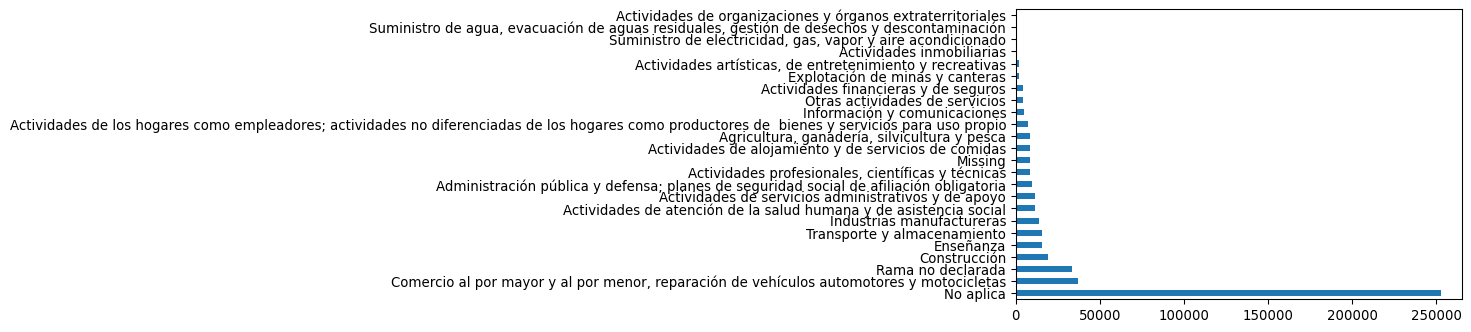

In [77]:
actividades_esconomicas_counts.plot(kind='barh')

In [78]:
microdatos_chile.P18.apply(lambda x : actividades_economicas[x]).value_counts()

No aplica                                                                                                                                           9337075
Comercio al por mayor y al por menor, reparación de vehículos automotores y motocicletas                                                            1250154
Rama no declarada                                                                                                                                   1149467
Construcción                                                                                                                                         639838
Enseñanza                                                                                                                                            538843
Transporte y almacenamiento                                                                                                                          538511
Industrias manufactureras                                       